# Midterm

### Importing Libraries

In [1]:
import pandas as pd 
    
# making dataframe 
df = pd.read_csv("BikeAccidents.csv") 

In [2]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### Transforming CSV to a Dataframe

In [3]:
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
df = df.drop(['Longitude', 'Latitude'], axis=1)
gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

Here I am just checking that when I coverted by csv to a dataframe nothing was change.

In [4]:
gdf.head()

DR Number Date Reported Date Occurred  Time Occurred  Area ID  Area Name  \
0  190617851       8/24/19       8/24/19           1115        6  Hollywood   
1  190715500       8/22/19       8/21/19           2230        7   Wilshire   
2  190715796       8/27/19       8/27/19           1420        7   Wilshire   
3  190814721       8/22/19       8/22/19           1730        8    West LA   
4  190814726       8/20/19       8/20/19            825        8    West LA   

   Reporting District  Crime Code Crime Code Description     MO_Codes  \
0                 615         997      TRAFFIC COLLISION  Veh vs Bike   
1                 727         997      TRAFFIC COLLISION  Veh vs Bike   
2                 745         997      TRAFFIC COLLISION  Veh vs Bike   
3                 842         997      TRAFFIC COLLISION  Veh vs Bike   
4                 851         997      TRAFFIC COLLISION  Veh vs Bike   

   Victim Age Victim Sex          Victim_Descent  Premise Code  \
0        52.0          M                   White         101.0   
1        24.0          F  Hispanic/Latin/Mexican         101.0   
2        46.0          M                   Other         101.0   
3        32.0          M                   White         101.0   
4        24.0          M             Other Asian         101.0   

  Premise Description                          Address  \
0              STREET  BARHAM                       BL   
1              STREET  BEVERLY                      BL   
2              STREET  LA BREA                      AV   
3              STREET  SANTA MONICA                 BL   
4              STREET  BROCKTON                     AV   

                      Cross Street      Lat      Long  \
0  WINNIE                       DR  34.1347 -118.3427   
1  LA BREA                      AV  34.0762 -118.3441   
2  SYCAMORE                     AV  34.0562 -118.3449   
3  BARRINGTON                   AV  34.0465 -118.4588   
4  SANTA MONICA                 BL  34.0398 -118.4598   

                      geometry  
0  POINT (-118.34270 34.13470)  
1  POINT (-118.34410 34.07620)  
2  POINT (-118.34490 34.05620)  
3  POINT (-118.45880 34.04650)  
4  POINT (-118.45980 34.03980)

Next, I am plotting it to see what the data I am working with looks like, and that I also make sure that it is being mapped correctly. 

<AxesSubplot:>

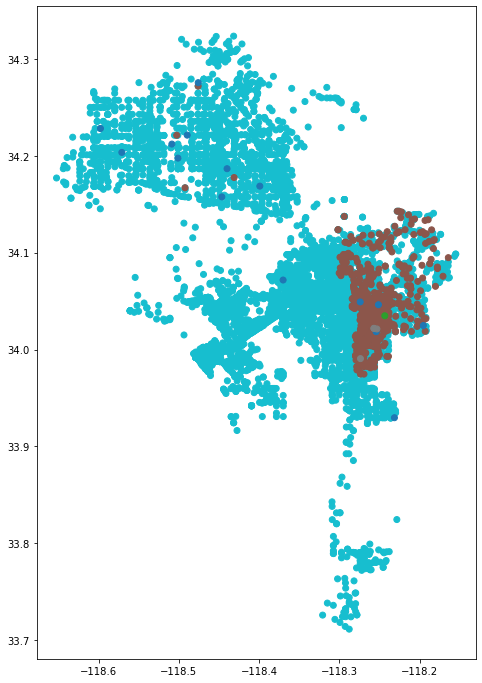

In [5]:
gdf.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'MO_Codes',   # column that defines the color of the dots
)

### Importing Additional Libraries to Work with the Data

This include libraries so that I am able to graph the data and plot it.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# for basemaps
import contextily as ctx
# for interactive plots
import plotly.express as px

In [7]:
# reproject to Web Mercator
osm_web_mercator = gdf.to_crs(epsg=3857)

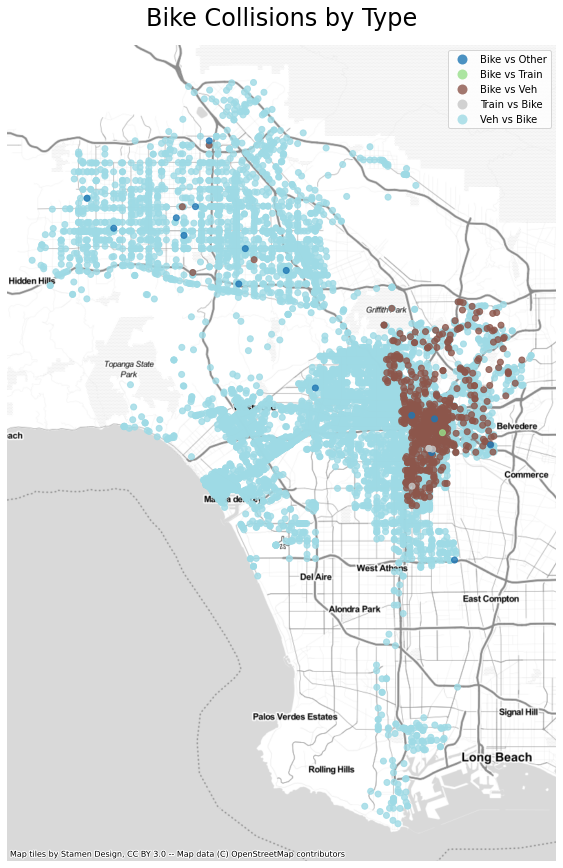

In [8]:
fig,ax = plt.subplots(figsize=(15,15))

osm_web_mercator.plot(ax=ax,
                    column='MO_Codes',
                    cmap='tab20',
                    alpha=0.8,
                    legend=True, 
                   )

# get rid of the axis
ax.axis('off');

ax.set_title("Bike Collisions by Type",fontsize=24,pad=20)


# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

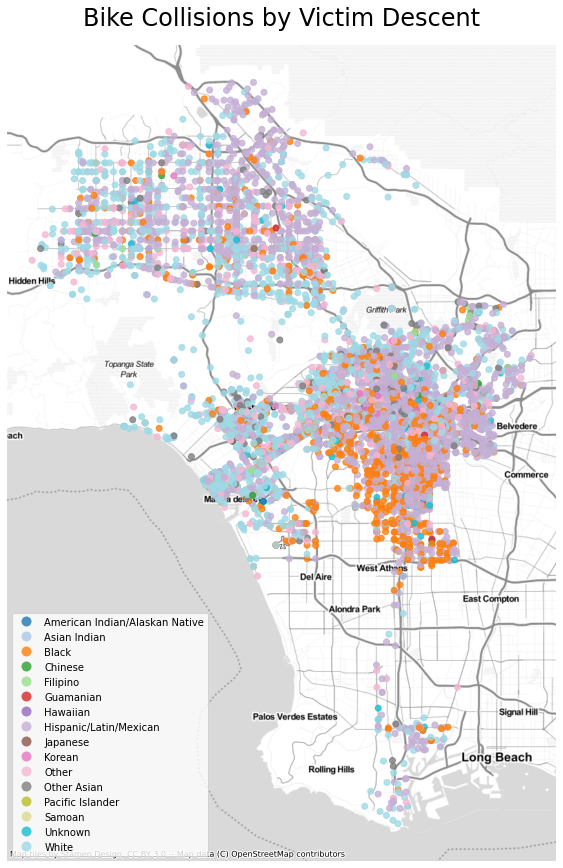

In [9]:
fig,ax = plt.subplots(figsize=(15,15))

osm_web_mercator.plot(ax=ax,
                    column='Victim_Descent',
                    cmap='tab20',
                    alpha=0.8,
                    legend=True,  
                   )

# get rid of the axis
ax.axis('off');

ax.set_title("Bike Collisions by Victim Descent",fontsize=24,pad=20)

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

In [10]:
import geopandas as gpd

In [11]:
census = gpd.read_file('data/acs2019_5yr_B03002_14000US06037222001.geojson')

<AxesSubplot:>

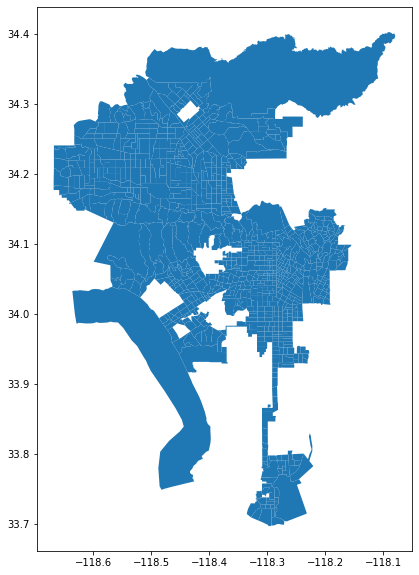

In [12]:
census.plot(figsize=(10,10))

In [13]:
census.tail()

geoid                                   name  B03002001  \
999   14000US06037980024  Census Tract 9800.24, Los Angeles, CA      223.0   
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA       26.0   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA        0.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA     1175.0   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   

      B03002001, Error  B03002002  B03002002, Error  B03002003  \
999               75.0      169.0              73.0      136.0   
1000              18.0       19.0              18.0        7.0   
1001              12.0        0.0              12.0        0.0   
1002             178.0      788.0             161.0      393.0   
1003              12.0        0.0              12.0        0.0   

      B03002003, Error  B03002004  B03002004, Error  ...  B03002017, Error  \
999               72.0       16.0              17.0  ...              12.0   
1000              10.0       11.0              11.0  ...              12.0   
1001              12.0        0.0              12.0  ...              12.0   
1002             108.0      232.0              97.0  ...              12.0   
1003              12.0        0.0              12.0  ...              12.0   

      B03002018  B03002018, Error  B03002019  B03002019, Error  B03002020  \
999        14.0              12.0        0.0              12.0        0.0   
1000        4.0               8.0        0.0              12.0        0.0   
1001        0.0              12.0        0.0              12.0        0.0   
1002       73.0              34.0       32.0              34.0       27.0   
1003        0.0              12.0        0.0              12.0        0.0   

      B03002020, Error  B03002021  B03002021, Error  \
999               12.0        0.0              12.0   
1000              12.0        0.0              12.0   
1001              12.0        0.0              12.0   
1002              34.0        5.0               7.0   
1003              12.0        0.0              12.0   

                                               geometry  
999   MULTIPOLYGON (((-118.51849 34.18389, -118.5184...  
1000  MULTIPOLYGON (((-118.35173 34.28034, -118.3517...  
1001  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
1002  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
1003  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...  

[5 rows x 45 columns]

In [14]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [15]:
census = census[columns_to_keep]

In [16]:
census.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'White',
 'Black',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Some other race',
 'Two or more races',
 'Hispanic',
 'geometry']

In [17]:
census.head()

geoid                                   name   Total  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  4283.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  3405.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  6347.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  3702.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA  3884.0   

   Non Hispanic   White  Black  American Indian and Alaska Native  Asian  \
0        3095.0  2616.0   19.0                                3.0  331.0   
1        3258.0  2882.0   74.0                               15.0  220.0   
2        3731.0  2986.0  198.0                                0.0  486.0   
3        2338.0  1812.0   87.0                                0.0  341.0   
4        3587.0  3126.0  205.0                                0.0  194.0   

   Native Hawaiian and Other Pacific Islander  Some other race  \
0                                         3.0              8.0   
1                                         0.0              0.0   
2                                         0.0             47.0   
3                                         0.0              0.0   
4                                         0.0              0.0   

   Two or more races  Hispanic  \
0              115.0    1188.0   
1               67.0     147.0   
2               14.0    2616.0   
3               98.0    1364.0   
4               62.0     297.0   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

<AxesSubplot:>

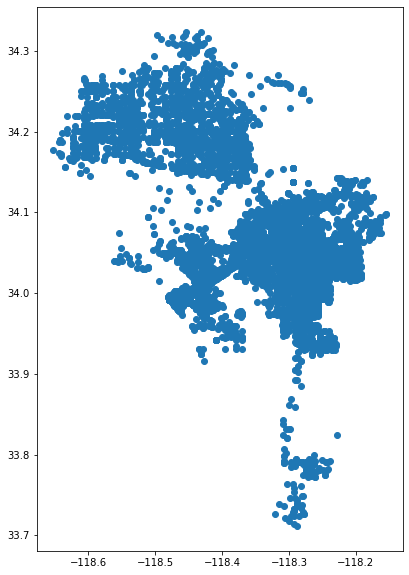

In [18]:
gdf.plot(figsize=(10,10))

In [19]:
census_gdf = gpd.sjoin(census, gdf) #Spatial join Points to polygons
census_gdf

geoid                                   name   Total  \
0     14000US06037101110  Census Tract 1011.10, Los Angeles, CA  4283.0   
0     14000US06037101110  Census Tract 1011.10, Los Angeles, CA  4283.0   
2     14000US06037101210  Census Tract 1012.10, Los Angeles, CA  6347.0   
3     14000US06037101220  Census Tract 1012.20, Los Angeles, CA  3702.0   
3     14000US06037101220  Census Tract 1012.20, Los Angeles, CA  3702.0   
...                  ...                                    ...     ...   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA  1175.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA  1175.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA  1175.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA  1175.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA  1175.0   

      Non Hispanic   White  Black  American Indian and Alaska Native  Asian  \
0           3095.0  2616.0   19.0                                3.0  331.0   
0           3095.0  2616.0   19.0                                3.0  331.0   
2           3731.0  2986.0  198.0                                0.0  486.0   
3           2338.0  1812.0   87.0                                0.0  341.0   
3           2338.0  1812.0   87.0                                0.0  341.0   
...            ...     ...    ...                                ...    ...   
1002         788.0   393.0  232.0                               26.0   36.0   
1002         788.0   393.0  232.0                               26.0   36.0   
1002         788.0   393.0  232.0                               26.0   36.0   
1002         788.0   393.0  232.0                               26.0   36.0   
1002         788.0   393.0  232.0                               26.0   36.0   

      Native Hawaiian and Other Pacific Islander  Some other race  ...  \
0                                            3.0              8.0  ...   
0                                            3.0              8.0  ...   
2                                            0.0             47.0  ...   
3                                            0.0              0.0  ...   
3                                            0.0              0.0  ...   
...                                          ...              ...  ...   
1002                                        24.0             25.0  ...   
1002                                        24.0             25.0  ...   
1002                                        24.0             25.0  ...   
1002                                        24.0             25.0  ...   
1002                                        24.0             25.0  ...   

         MO_Codes  Victim Age Victim Sex          Victim_Descent  \
0     Veh vs Bike        24.0          F  Hispanic/Latin/Mexican   
0     Veh vs Bike        26.0          M  Hispanic/Latin/Mexican   
2     Veh vs Bike        28.0          M                   Other   
3     Veh vs Bike        22.0          M                   White   
3     Veh vs Bike         NaN          M  Hispanic/Latin/Mexican   
...           ...         ...        ...                     ...   
1002  Veh vs Bike        26.0          F  Hispanic/Latin/Mexican   
1002  Veh vs Bike        39.0          F  Hispanic/Latin/Mexican   
1002  Veh vs Bike        78.0          M                   White   
1002  Veh vs Bike        40.0          M  Hispanic/Latin/Mexican   
1002  Veh vs Bike        61.0          M                   White   

      Premise Code Premise Description                          Address  \
0            101.0              STREET  APPERSON                     ST   
0            101.0              STREET                         FOOTHILL   
2            101.0              STREET  FOOTHILL                     BL   
3            101.0              STREET  FOOTHILL                     BL   
3            101.0              STREET                         FOOTHILL   
...          

In [20]:
MO_Codes = census_gdf.value_counts('name').reset_index(name='MO_Codes')
MO_Codes

name  MO_Codes
0    Census Tract 2260.02, Los Angeles, CA       154
1    Census Tract 2077.10, Los Angeles, CA       146
2    Census Tract 2240.20, Los Angeles, CA        99
3       Census Tract 2079, Los Angeles, CA        84
4    Census Tract 2060.31, Los Angeles, CA        78
..                                     ...       ...
930  Census Tract 1397.03, Los Angeles, CA         1
931  Census Tract 1411.02, Los Angeles, CA         1
932     Census Tract 1415, Los Angeles, CA         1
933  Census Tract 1439.02, Los Angeles, CA         1
934     Census Tract 1330, Los Angeles, CA         1

[935 rows x 2 columns]

In [21]:
census = census.merge(MO_Codes, how='left', on='name')

In [22]:
census.sample(5)

geoid                                   name   Total  \
42   14000US06037106403  Census Tract 1064.03, Los Angeles, CA  3667.0   
631  14000US06037214901  Census Tract 2149.01, Los Angeles, CA  3250.0   
249  14000US06037131020  Census Tract 1310.20, Los Angeles, CA  6704.0   
171  14000US06037123103  Census Tract 1231.03, Los Angeles, CA  3808.0   
564  14000US06037209103  Census Tract 2091.03, Los Angeles, CA  3679.0   

     Non Hispanic   White  Black  American Indian and Alaska Native  Asian  \
42          349.0   280.0   62.0                                0.0    7.0   
631        2911.0  2212.0   62.0                               61.0  373.0   
249        2036.0  1061.0  197.0                                0.0  551.0   
171        1737.0  1120.0  207.0                                0.0  394.0   
564         301.0    64.0  188.0                                0.0   37.0   

     Native Hawaiian and Other Pacific Islander  Some other race  \
42                                          0.0              0.0   
631                                         0.0             12.0   
249                                         4.0             30.0   
171                                         0.0              0.0   
564                                         0.0              0.0   

     Two or more races  Hispanic  \
42                 0.0    3318.0   
631              191.0     339.0   
249              193.0    4668.0   
171               16.0    2071.0   
564               12.0    3378.0   

                                              geometry  MO_Codes  
42   MULTIPOLYGON (((-118.44971 34.30759, -118.4481...       6.0  
631  MULTIPOLYGON (((-118.39072 34.07650, -118.3903...       5.0  
249  MULTIPOLYGON (((-118.54395 34.19396, -118.5439...      18.0  
171  MULTIPOLYGON (((-118.37031 34.18850, -118.3703...      13.0  
564  MULTIPOLYGON (((-118.26605 34.05618, -118.2660...       5.0

In [23]:
bikelane = gpd.read_file('Bikeways.geojson')

In [24]:
bikelane.head()

OBJECTID Network              Bikeway       Street      From_  \
0         1                         Lane     Mateo St     6th St   
1         2                         Lane     Mateo St     6th St   
2         3                         Lane     Mateo St     6th St   
3         4                         Lane     Mateo St     6th St   
4         5          Protected Bike Lane  Lomita Blvd  Eubank Av   

                     To_  Shape_Leng               Install_Date Region  \
0   4th Pl / Santa Fe Av         0.0  2019-03-01T00:00:00+00:00          
1   4th Pl / Santa Fe Av         0.0  2019-03-01T00:00:00+00:00          
2   4th Pl / Santa Fe Av         0.0  2019-03-01T00:00:00+00:00          
3   4th Pl / Santa Fe Av         0.0  2019-03-01T00:00:00+00:00          
4            Avalon Blvd         0.0  2019-04-26T00:00:00+00:00          

          Bikeway_Type              Datasource_DT  \
0                 Lane  2020-04-08T00:00:00+00:00   
1                 Lane  2020-04-08T00:00:00+00:00   
2                 Lane  2020-04-08T00:00:00+00:00   
3                 Lane  2020-04-08T00:00:00+00:00   
4  Protected Bike Lane  2020-04-08T00:00:00+00:00   

                                            geometry  
0  LINESTRING Z (-118.23294 34.04017 0.00000, -11...  
1  LINESTRING Z (-118.23311 34.04119 0.00000, -11...  
2  LINESTRING Z (-118.23298 34.04045 0.00000, -11...  
3  LINESTRING Z (-118.23283 34.03920 0.00000, -11...  
4  LINESTRING Z (-118.25847 33.79945 0.00000, -11...

Text(0.5, 1.0, 'Bike Collisions and Bike Lanes in LA')

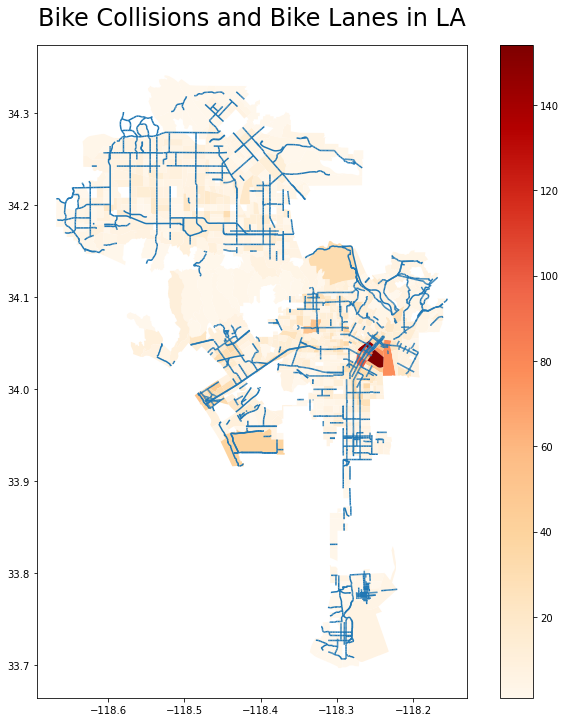

In [25]:
fig,ax = plt.subplots(figsize=(12,12))

census.plot(ax=ax,column='MO_Codes',legend=True,cmap='OrRd')

bikelane.plot(ax=ax)

ax.set_title("Bike Collisions and Bike Lanes in LA",fontsize=24,pad=20)

In [26]:
gdf.to_file('BikeAccidents.geojson')

/tmp/ipykernel_105/2582369786.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('BikeAccidents.geojson')


<AxesSubplot:>

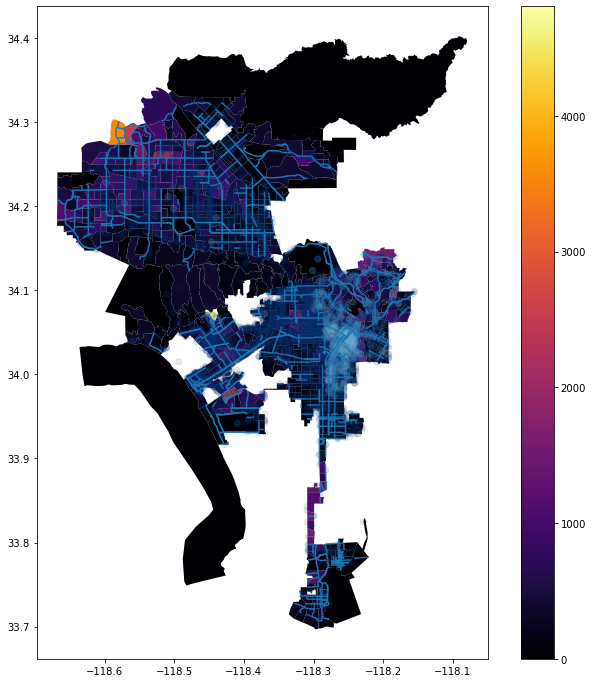

In [27]:
fig,ax = plt.subplots(figsize=(12,12))

census.plot(ax=ax,column='Asian',legend=True,cmap='inferno')

gdf.plot(ax=ax,column='MO_Codes',cmap='Blues',alpha=.1)

bikelane.plot(ax=ax)

#### fig,ax = plt.subplots(figsize=(12,12))

census.plot(ax=ax,column='Black or African alone',legend=True,cmap='RdPu')

bikelane.plot(ax=ax)


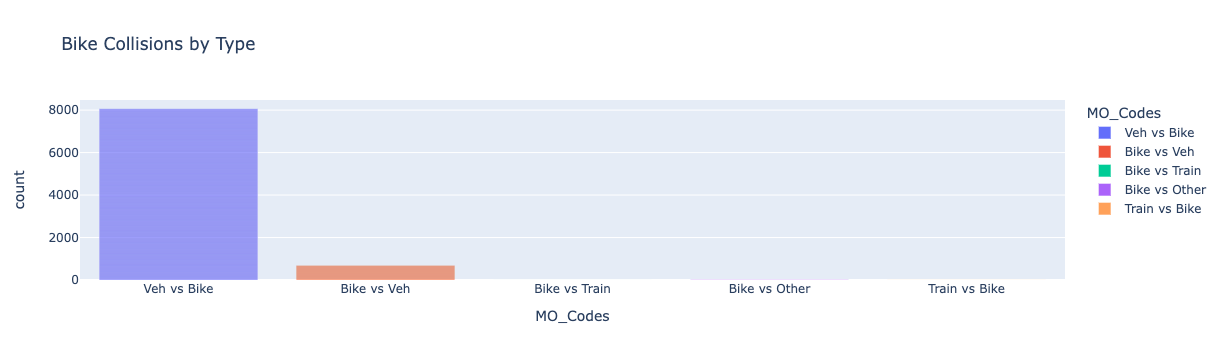

In [28]:
# a simple bar chart, putting date on the x-axis
fig = px.bar(gdf,
       x='MO_Codes',
       title='Bike Collisions by Type',
        color='MO_Codes')

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [29]:
gdf.Victim_Descent.unique().tolist()

['White',
 'Hispanic/Latin/Mexican',
 'Other',
 'Other Asian',
 'Korean',
 nan,
 'Unknown',
 'Black',
 'Filipino',
 'Pacific Islander',
 'Asian Indian ',
 'Chinese',
 'Hawaiian',
 'Samoan',
 'Japanese',
 'American Indian/Alaskan Native',
 'Guamanian']

In [30]:
collision_by_descent = gdf.value_counts('Victim_Descent').reset_index(name='count')
collision_by_descent

Victim_Descent  count
0           Hispanic/Latin/Mexican   4179
1                            White   2101
2                            Black   1190
3                            Other    667
4                      Other Asian    318
5                          Unknown    111
6                           Korean     60
7                         Filipino     19
8                          Chinese      9
9                         Japanese      9
10                       Guamanian      5
11  American Indian/Alaskan Native      4
12                Pacific Islander      4
13                   Asian Indian       2
14                        Hawaiian      1
15                          Samoan      1

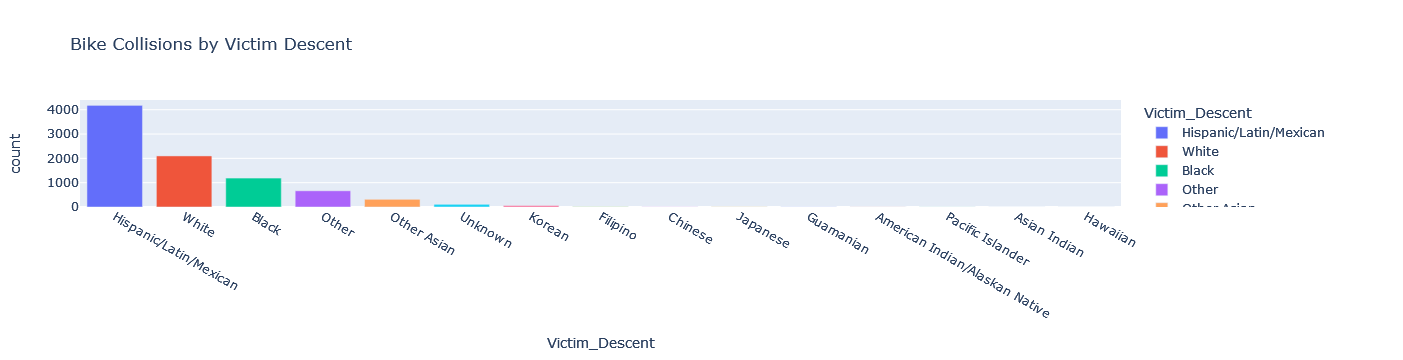

In [31]:
fig = px.bar(collision_by_descent.head(15),
       x='Victim_Descent',
       y='count',
       title='Bike Collisions by Victim Descent',
        color='Victim_Descent')

fig.show()

Text(0.5, 1.0, 'Bike Lanes in LA by Race: Asian')

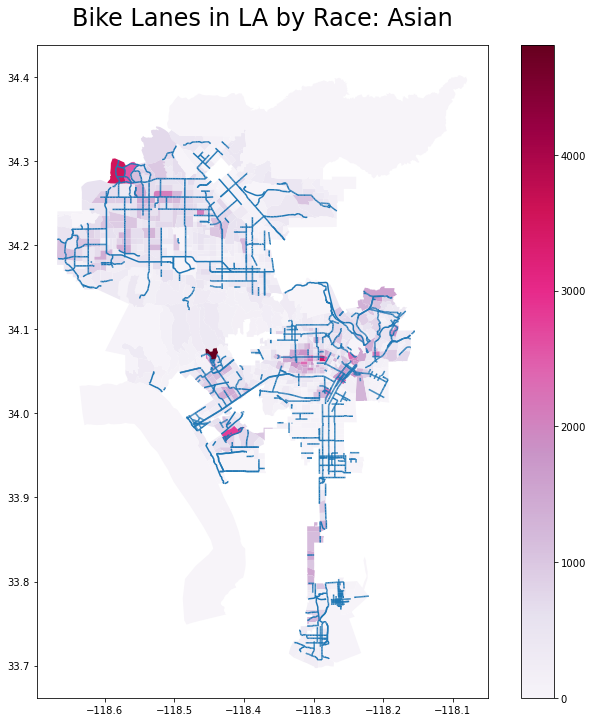

In [32]:
fig,ax = plt.subplots(figsize=(12,12))

census.plot(ax=ax,column='Asian',legend=True,cmap='PuRd')

bikelane.plot(ax=ax)

ax.set_title("Bike Lanes in LA by Race: Asian",fontsize=24,pad=20)

Text(0.5, 1.0, 'Bike Lanes in LA by Race: Black ')

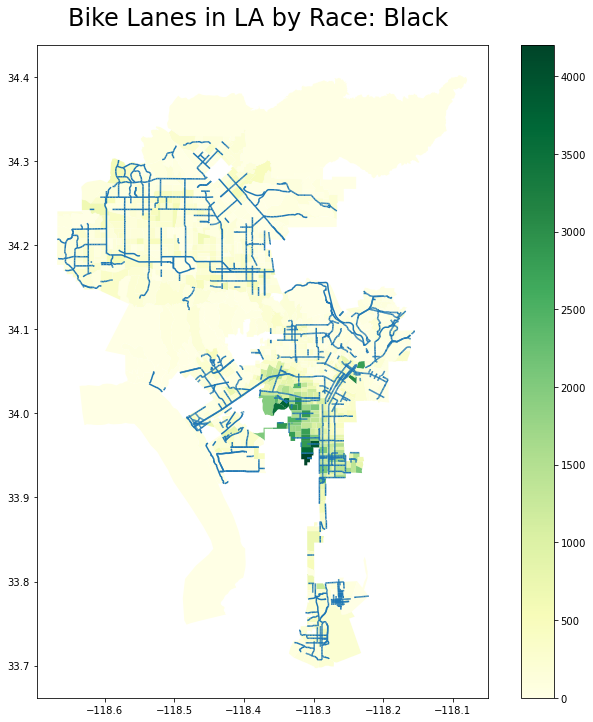

In [33]:
fig,ax = plt.subplots(figsize=(12,12))

census.plot(ax=ax,column='Black',legend=True,cmap='YlGn')

bikelane.plot(ax=ax)

ax.set_title("Bike Lanes in LA by Race: Black ",fontsize=24,pad=20)

Text(0.5, 1.0, 'Bike Lanes in LA by Race: White')

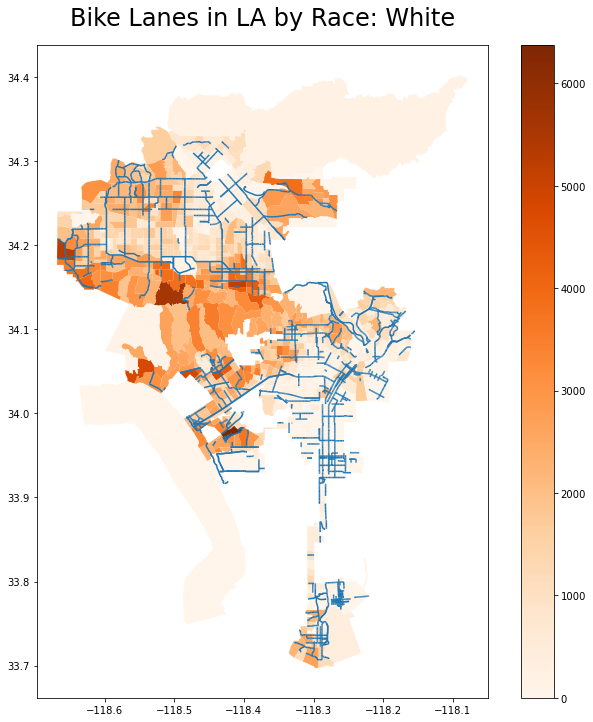

In [34]:
fig,ax = plt.subplots(figsize=(12,12))

census.plot(ax=ax,column='White',legend=True,cmap='Oranges')

bikelane.plot(ax=ax)

ax.set_title("Bike Lanes in LA by Race: White",fontsize=24,pad=20)

Text(0.5, 1.0, 'Bike Lanes in LA by Race: American Indian and Alaska Native')

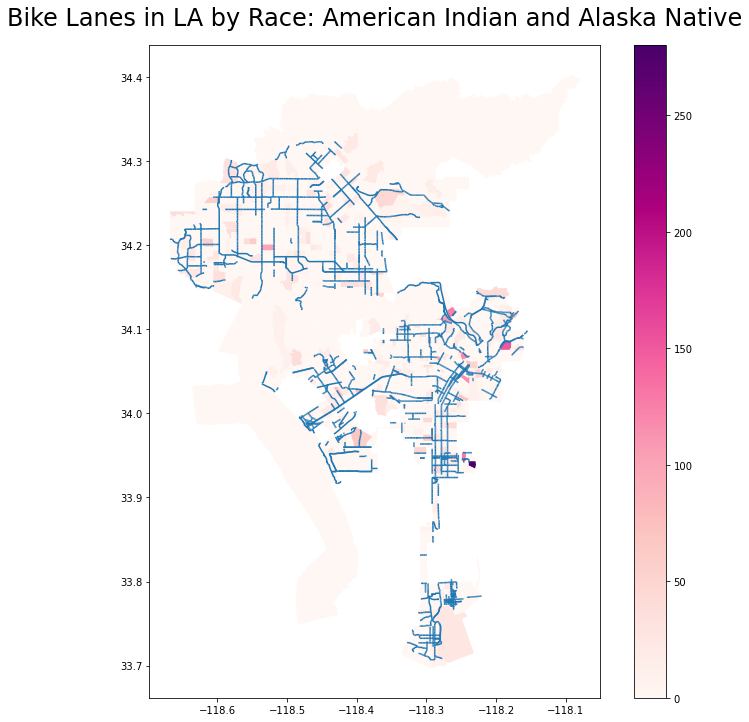

In [35]:
fig,ax = plt.subplots(figsize=(12,12))

census.plot(ax=ax,column='American Indian and Alaska Native',legend=True,cmap='RdPu')

bikelane.plot(ax=ax)

ax.set_title("Bike Lanes in LA by Race: American Indian and Alaska Native",fontsize=24,pad=20)



Text(0.5, 1.0, 'Bike Lanes in LA by Race: American Indian and Alaska Native')

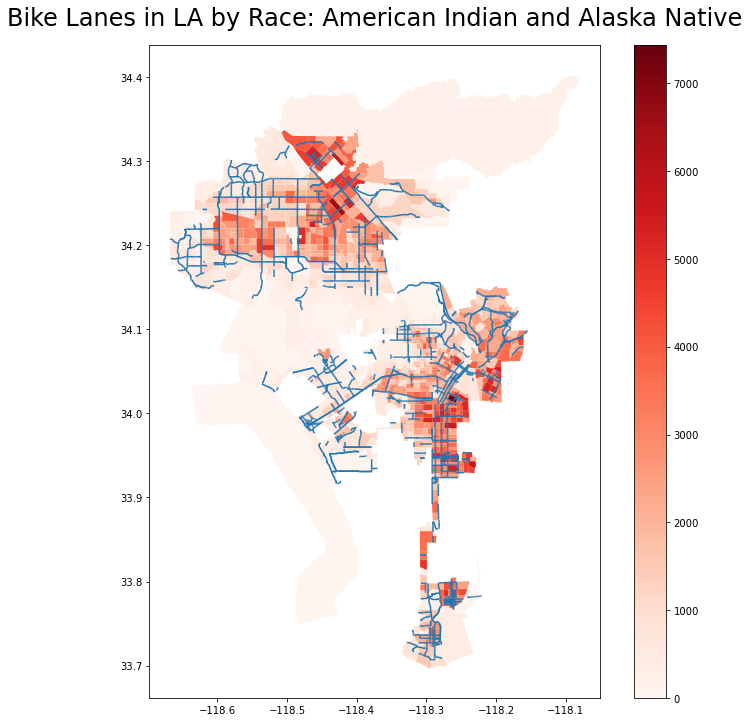

In [36]:
fig,ax = plt.subplots(figsize=(12,12))

census.plot(ax=ax,column='Hispanic',legend=True,cmap='Reds')

bikelane.plot(ax=ax)

ax.set_title("Bike Lanes in LA by Race: Hispanic/Latino",fontsize=24,pad=20)

### Folium Map

In [37]:
gdf.head()

DR Number Date Reported Date Occurred  Time Occurred  Area ID  Area Name  \
0  190617851       8/24/19       8/24/19           1115        6  Hollywood   
1  190715500       8/22/19       8/21/19           2230        7   Wilshire   
2  190715796       8/27/19       8/27/19           1420        7   Wilshire   
3  190814721       8/22/19       8/22/19           1730        8    West LA   
4  190814726       8/20/19       8/20/19            825        8    West LA   

   Reporting District  Crime Code Crime Code Description     MO_Codes  \
0                 615         997      TRAFFIC COLLISION  Veh vs Bike   
1                 727         997      TRAFFIC COLLISION  Veh vs Bike   
2                 745         997      TRAFFIC COLLISION  Veh vs Bike   
3                 842         997      TRAFFIC COLLISION  Veh vs Bike   
4                 851         997      TRAFFIC COLLISION  Veh vs Bike   

   Victim Age Victim Sex          Victim_Descent  Premise Code  \
0        52.0          M                   White         101.0   
1        24.0          F  Hispanic/Latin/Mexican         101.0   
2        46.0          M                   Other         101.0   
3        32.0          M                   White         101.0   
4        24.0          M             Other Asian         101.0   

  Premise Description                          Address  \
0              STREET  BARHAM                       BL   
1              STREET  BEVERLY                      BL   
2              STREET  LA BREA                      AV   
3              STREET  SANTA MONICA                 BL   
4              STREET  BROCKTON                     AV   

                      Cross Street      Lat      Long  \
0  WINNIE                       DR  34.1347 -118.3427   
1  LA BREA                      AV  34.0762 -118.3441   
2  SYCAMORE                     AV  34.0562 -118.3449   
3  BARRINGTON                   AV  34.0465 -118.4588   
4  SANTA MONICA                 BL  34.0398 -118.4598   

                      geometry  
0  POINT (-118.34270 34.13470)  
1  POINT (-118.34410 34.07620)  
2  POINT (-118.34490 34.05620)  
3  POINT (-118.45880 34.04650)  
4  POINT (-118.45980 34.03980)

Here we are cleaning the data so that we only keep the columns that we are intrested in.

In [38]:
gdf_mini = gdf[['MO_Codes','Victim_Descent','Lat','Long']].copy()

No we are looking at so see that our clean data only has the columns we want. 

In [39]:
gdf_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8744 entries, 0 to 8743
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MO_Codes        8744 non-null   object 
 1   Victim_Descent  8680 non-null   object 
 2   Lat             8744 non-null   float64
 3   Long            8744 non-null   float64
dtypes: float64(2), object(2)
memory usage: 273.4+ KB


Now we are converting our lat and lon into floats, and seeing the .head so we know that it worked. 

In [40]:
# convert lat/lon's to floats
gdf_mini['Lat'] = gdf_mini['Lat'].astype(float)
gdf_mini['Long'] = gdf_mini['Long'].astype(float)
gdf_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8744 entries, 0 to 8743
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MO_Codes        8744 non-null   object 
 1   Victim_Descent  8680 non-null   object 
 2   Lat             8744 non-null   float64
 3   Long            8744 non-null   float64
dtypes: float64(2), object(2)
memory usage: 273.4+ KB


Next we are plotting the points. 

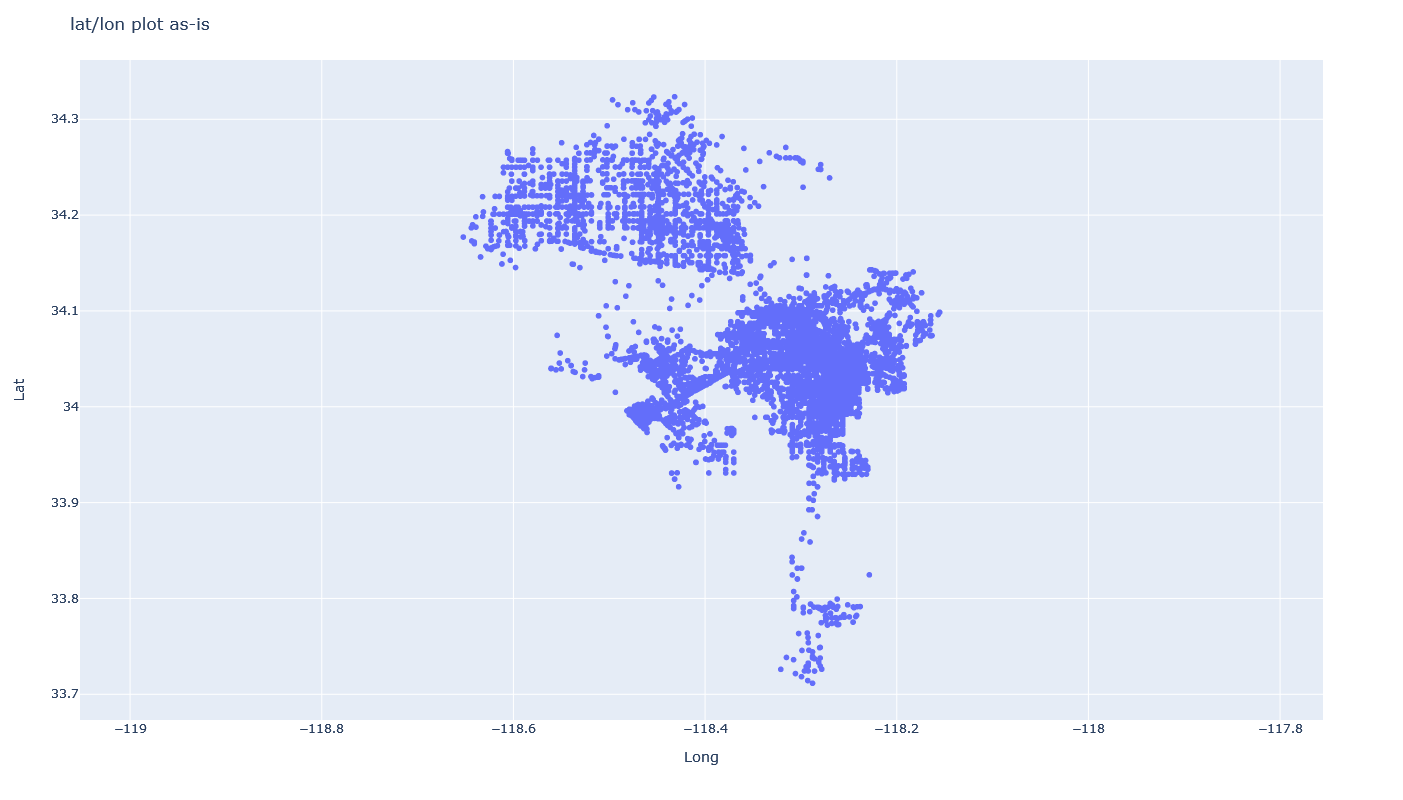

In [41]:
# plot it
fig = px.scatter(gdf_mini,
           x='Long',
           y='Lat'
)

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "lat/lon plot as-is"
)

# make it a square grid
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()

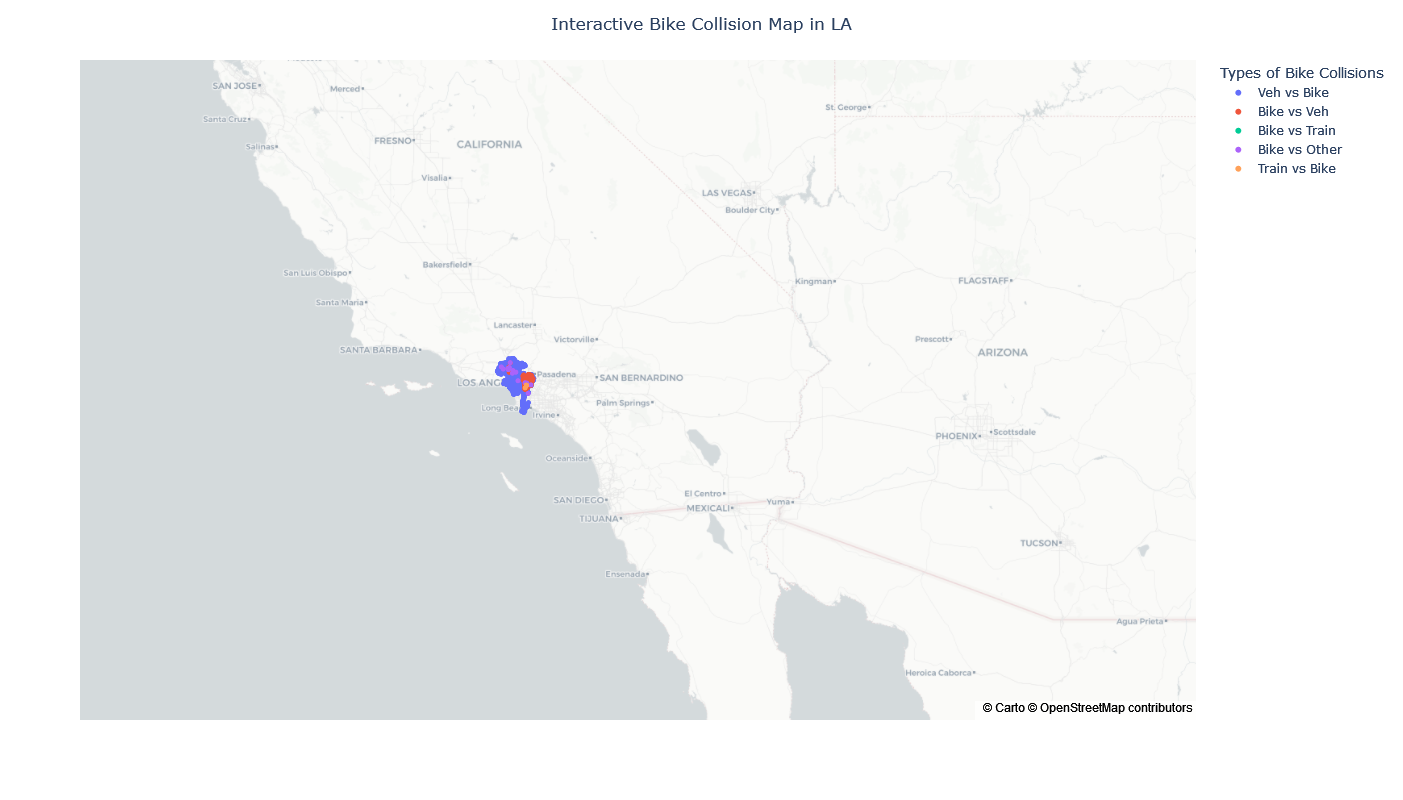

In [42]:
fig = px.scatter_mapbox(gdf_mini,
                        lat='Lat',
                        lon='Long',
                        color="MO_Codes",
                        labels={'MO_Codes':'Types of Bike Collisions'},
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive Bike Collision Map in LA",
    title_x=0.5 # aligns title to center
)

fig.show()

In [43]:
race = ['White',
 'Black',
 'Hispanic']

In [44]:
print(race)

['White', 'Black', 'Hispanic']


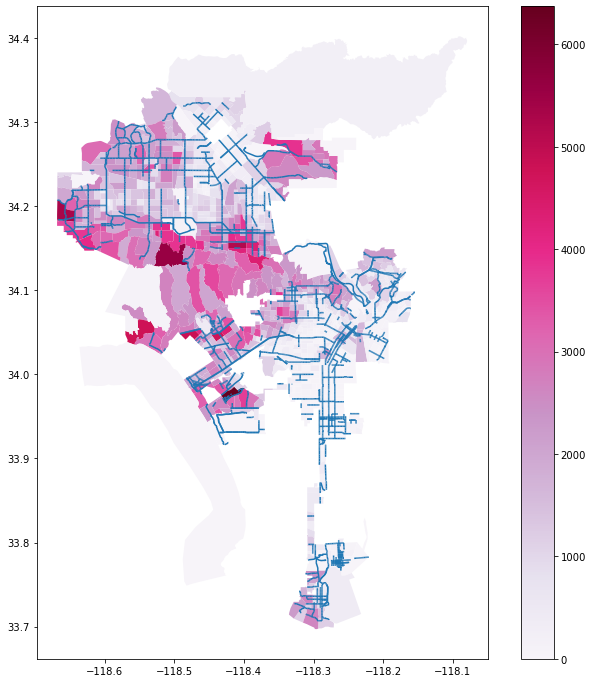

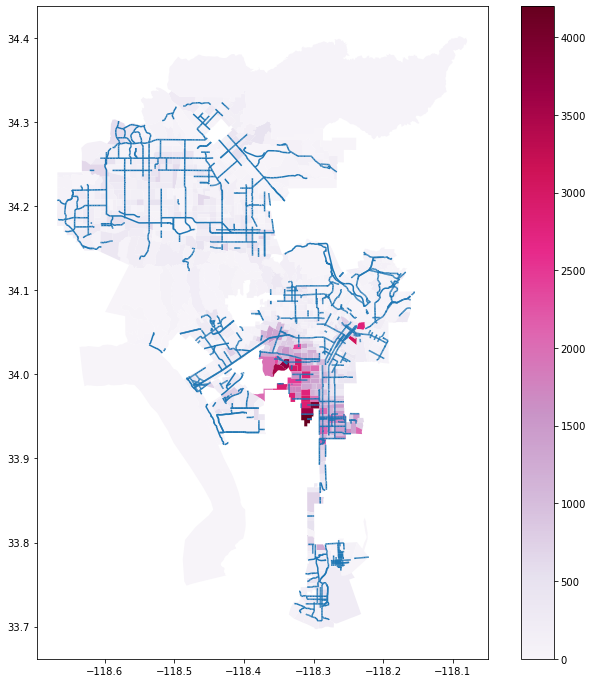

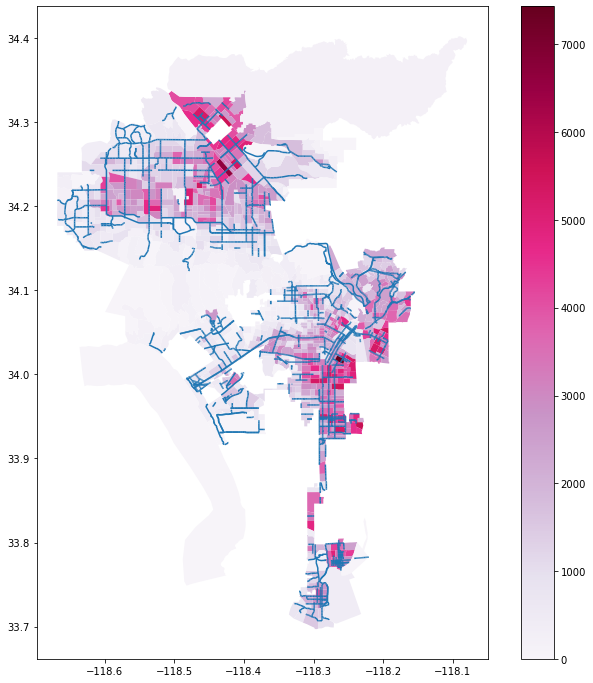

In [53]:
for x in race: 
    fig,ax = plt.subplots(figsize=(12,12))

    census.plot(ax=ax,
            column=x,
            legend=True,
            cmap='PuRd')

    bikelane.plot(ax=ax)
    
